In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

%matplotlib inline

## Split, apply, and combine

In [5]:
sensors = pd.DataFrame([
              {'interval': 0, 'sensor': 'accel', 'axis': 'X', 'reading': 0.0},
              {'interval': 0, 'sensor': 'accel', 'axis': 'Y', 'reading': 0.5},
              {'interval': 0, 'sensor': 'accel', 'axis': 'Z', 'reading': 1.0},
              {'interval': 1, 'sensor': 'accel', 'axis': 'X', 'reading': 0.1},
              {'interval': 1, 'sensor': 'accel', 'axis': 'Y', 'reading': 0.4},
              {'interval': 1, 'sensor': 'accel', 'axis': 'Z', 'reading': 0.9},
              {'interval': 2, 'sensor': 'accel', 'axis': 'X', 'reading': 0.2},
              {'interval': 2, 'sensor': 'accel', 'axis': 'Y', 'reading': 0.3},
              {'interval': 2, 'sensor': 'accel', 'axis': 'Z', 'reading': 0.8},
              {'interval': 3, 'sensor': 'accel', 'axis': 'X', 'reading': 0.3},
              {'interval': 3, 'sensor': 'accel', 'axis': 'Y', 'reading': 0.2},
              {'interval': 3, 'sensor': 'accel', 'axis': 'Z', 'reading': 0.7},

              {'interval': 0, 'sensor': 'orientation', 'axis': 'X', 'reading': 0.0},
              {'interval': 0, 'sensor': 'orientation', 'axis': 'Y', 'reading': 0.0},
              {'interval': 0, 'sensor': 'orientation', 'axis': 'Z', 'reading': 0.0},
              {'interval': 1, 'sensor': 'orientation', 'axis': 'X', 'reading': 0.0},
              {'interval': 1, 'sensor': 'orientation', 'axis': 'Y', 'reading': 0.0},
              {'interval': 1, 'sensor': 'orientation', 'axis': 'Z', 'reading': 0.0},
              {'interval': 2, 'sensor': 'orientation', 'axis': 'X', 'reading': 0.0},
              {'interval': 2, 'sensor': 'orientation', 'axis': 'Y', 'reading': 0.3},
              {'interval': 2, 'sensor': 'orientation', 'axis': 'Z', 'reading': 0.2},
              {'interval': 3, 'sensor': 'orientation', 'axis': 'X', 'reading': 0.0},
              {'interval': 3, 'sensor': 'orientation', 'axis': 'Y', 'reading': 0.4},
              {'interval': 3, 'sensor': 'orientation', 'axis': 'Z', 'reading': 0.3},
             ])
sensors

,axis,interval,reading,sensor
0,X,0,0.0,accel
1,Y,0,0.5,accel
2,Z,0,1.0,accel
3,X,1,0.1,accel
4,Y,1,0.4,accel
...,...,...,...,...
19,Y,2,0.3,orientation
20,Z,2,0.2,orientation
21,X,3,0.0,orientation
22,Y,3,0.4,orientation


In [7]:
grouped = sensors.groupby('sensor')
grouped

In [8]:
grouped.ngroups

2

In [9]:
grouped.groups

{'accel': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'orientation': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}

In [10]:
def print_groups(groupobject):
    for name, group in groupobject:
        print(name)
        print(group)

In [11]:
print_groups(grouped)

accel
   axis  interval  reading sensor
0     X         0      0.0  accel
1     Y         0      0.5  accel
2     Z         0      1.0  accel
3     X         1      0.1  accel
4     Y         1      0.4  accel
..  ...       ...      ...    ...
7     Y         2      0.3  accel
8     Z         2      0.8  accel
9     X         3      0.3  accel
10    Y         3      0.2  accel
11    Z         3      0.7  accel

[12 rows x 4 columns]
orientation
   axis  interval  reading       sensor
12    X         0      0.0  orientation
13    Y         0      0.0  orientation
14    Z         0      0.0  orientation
15    X         1      0.0  orientation
16    Y         1      0.0  orientation
..  ...       ...      ...          ...
19    Y         2      0.3  orientation
20    Z         2      0.2  orientation
21    X         3      0.0  orientation
22    Y         3      0.4  orientation
23    Z         3      0.3  orientation

[12 rows x 4 columns]


In [12]:
grouped.size()

sensor
accel          12
orientation    12
dtype: int64

In [13]:
grouped.count()

,axis,interval,reading
sensor,,,
accel,12,12,12
orientation,12,12,12


In [16]:
grouped.get_group('accel')

,axis,interval,reading,sensor
0,X,0,0.0,accel
1,Y,0,0.5,accel
2,Z,0,1.0,accel
3,X,1,0.1,accel
4,Y,1,0.4,accel
...,...,...,...,...
7,Y,2,0.3,accel
8,Z,2,0.8,accel
9,X,3,0.3,accel
10,Y,3,0.2,accel


In [17]:
grouped.head(3)

,axis,interval,reading,sensor
0,X,0,0.0,accel
1,Y,0,0.5,accel
2,Z,0,1.0,accel
12,X,0,0.0,orientation
13,Y,0,0.0,orientation
14,Z,0,0.0,orientation


In [18]:
grouped.nth(0)

,axis,interval,reading,sensor
sensor,,,,
accel,X,0,0,accel
orientation,X,0,0,orientation


In [19]:
grouped.nth(1)

,axis,interval,reading,sensor
sensor,,,,
accel,Y,0,0.5,accel
orientation,Y,0,0.0,orientation


In [20]:
grouped.nth(2)

,axis,interval,reading,sensor
sensor,,,,
accel,Z,0,1,accel
orientation,Z,0,0,orientation


In [22]:
mcg = sensors.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
  axis  interval  reading sensor
0    X         0      0.0  accel
3    X         1      0.1  accel
6    X         2      0.2  accel
9    X         3      0.3  accel
('accel', 'Y')
   axis  interval  reading sensor
1     Y         0      0.5  accel
4     Y         1      0.4  accel
7     Y         2      0.3  accel
10    Y         3      0.2  accel
('accel', 'Z')
   axis  interval  reading sensor
2     Z         0      1.0  accel
5     Z         1      0.9  accel
8     Z         2      0.8  accel
11    Z         3      0.7  accel
('orientation', 'X')
   axis  interval  reading       sensor
12    X         0        0  orientation
15    X         1        0  orientation
18    X         2        0  orientation
21    X         3        0  orientation
('orientation', 'Y')
   axis  interval  reading       sensor
13    Y         0      0.0  orientation
16    Y         1      0.0  orientation
19    Y         2      0.3  orientation
22    Y         3      0.4  orientation
('orient

In [23]:
mcg.describe()

interval   reading
sensor      axis                          
accel       X    count  4.000000  4.000000
                 mean   1.500000  0.150000
                 std    1.290994  0.129099
                 min    0.000000  0.000000
                 25%    0.750000  0.075000
...                          ...       ...
orientation Z    min    0.000000  0.000000
                 25%    0.750000  0.000000
                 50%    1.500000  0.100000
                 75%    2.250000  0.225000
                 max    3.000000  0.300000

[48 rows x 2 columns]

In [24]:
mi = sensors.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

interval  reading
sensor      axis                   
accel       X            0      0.0
            Y            0      0.5
            Z            0      1.0
            X            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            Z            2      0.2
            X            3      0.0
            Y            3      0.4
            Z            3      0.3

[24 rows x 2 columns]

In [28]:
mig_l1 = mi.groupby(level=0)
print_groups(mig_l1)

accel
             interval  reading
sensor axis                   
accel  X            0      0.0
       Y            0      0.5
       Z            0      1.0
       X            1      0.1
       Y            1      0.4
...               ...      ...
       Y            2      0.3
       Z            2      0.8
       X            3      0.3
       Y            3      0.2
       Z            3      0.7

[12 rows x 2 columns]
orientation
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            Y            0      0.0
            Z            0      0.0
            X            1      0.0
            Y            1      0.0
...                    ...      ...
            Y            2      0.3
            Z            2      0.2
            X            3      0.0
            Y            3      0.4
            Z            3      0.3

[12 rows x 2 columns]


In [29]:
mig_l12 = mi.groupby(level=['sensor', 'axis'])
print_groups(mig_l12)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      0.0
       X            1      0.1
       X            2      0.2
       X            3      0.3
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      1.0
       Z            1      0.9
       Z            2      0.8
       Z            3      0.7
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0        0
            X            1        0
            X            2        0
            X            3        0
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.0
            Y            1     

In [30]:
mig_l12.agg(np.mean)

interval  reading
sensor      axis                   
accel       X          1.5    0.150
            Y          1.5    0.350
            Z          1.5    0.850
orientation X          1.5    0.000
            Y          1.5    0.175
            Z          1.5    0.125

In [34]:
sensors.groupby(['sensor', 'axis'], 
                 as_index=False).agg(np.mean)

,sensor,axis,interval,reading
0,accel,X,1.5,0.150
1,accel,Y,1.5,0.350
2,accel,Z,1.5,0.850
3,orientation,X,1.5,0.000
4,orientation,Y,1.5,0.175
5,orientation,Z,1.5,0.125


gb.agg gb.boxplot gb.cummin gb.describe  gb.filter  gb.get_group
gb.height  gb.last  gb.median  gb.ngroups  gb.plot  gb.rank  
gb.std  gb.transform
gb.aggregate  gb.count  gb.cumprod  gb.dtype  gb.first  gb.groups
gb.hist  gb.max  gb.min  gb.nth  gb.prod  gb.resamp  
gb.sum  gb.var
gb.apply  gb.cummax  gb.cumsum  gb.fillna  gb.gender  gb.head
gb.indices  gb.mean  gb.name  gb.ohlc  gb.quantile  gb.size
gb.tail  gb.weight

In [40]:
mig_l12.mean()

interval  reading
sensor      axis                   
accel       X          1.5    0.150
            Y          1.5    0.350
            Z          1.5    0.850
orientation X          1.5    0.000
            Y          1.5    0.175
            Z          1.5    0.125

In [42]:
mig_l12.agg([np.sum, np.std])

interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     3.4  0.129099
orientation X           6  1.290994     0.0  0.000000
            Y           6  1.290994     0.7  0.206155
            Z           6  1.290994     0.5  0.150000

In [46]:
mig_l12.agg({'interval': len,
             'reading': np.mean})

interval  reading
sensor      axis                   
accel       X            4    0.150
            Y            4    0.350
            Z            4    0.850
orientation X            4    0.000
            Y            4    0.175
            Z            4    0.125

In [47]:
mig_l12['reading'].mean()

sensor       axis
accel        X       0.150
             Y       0.350
             Z       0.850
orientation  X       0.000
             Y       0.175
             Z       0.125
Name: reading, dtype: float64

In [50]:
df = pd.DataFrame({'label': ['A', 'C', 'B', 'A', 'C'],
                 'Values': [0, 1, 2, 3, 4],
                 'Values2': [5, 6, 7, 8, 9],
                 'Noise': ['foo', 'bar', 'baz',
                           'foobar', 'barbaz']})
df

,Noise,Values,Values2,label
0,foo,0,5,A
1,bar,1,6,C
2,baz,2,7,B
3,foobar,3,8,A
4,barbaz,4,9,C


In [51]:
grouped = df.groupby('label')
print_groups(grouped)

A
    Noise  Values  Values2 label
0     foo       0        5     A
3  foobar       3        8     A
B
  Noise  Values  Values2 label
2   baz       2        7     B
C
    Noise  Values  Values2 label
1     bar       1        6     C
4  barbaz       4        9     C


In [52]:
grouped.transform(lambda x: x + 10)

,Values,Values2
0,10,15
1,11,16
2,12,17
3,13,18
4,14,19


In [54]:
def xplus10(x):
    print (x)
    return x + 10

grouped.transform(xplus10)

0       foo
3    foobar
Name: Noise, dtype: object
0       foo
3    foobar
Name: Noise, dtype: object
0       foo
3    foobar
Name: A, dtype: object
0    0
3    3
Name: A, dtype: int64
2    2
Name: B, dtype: int64
1    1
4    4
Name: C, dtype: int64
0    5
3    8
Name: A, dtype: int64
2    7
Name: B, dtype: int64
1    6
4    9
Name: C, dtype: int64


,Values,Values2
0,10,15
1,11,16
2,12,17
3,13,18
4,14,19


In [55]:
grouped.transform(lambda x: x.sum())

,Noise,Values,Values2
0,foo,0,5
1,bar,1,6
2,baz,2,7
3,foobar,3,8
4,barbaz,4,9


In [56]:
df = pd.DataFrame({'Label': list("ABABAB"),
                   'Values': [10, 20, 11, np.nan, 12, 22]},
                   index=['i1', 'i2', 'i3', 'i4', 'i5', 'i6'])
df

,Label,Values
i1,A,10
i2,B,20
i3,A,11
i4,B,NaN
i5,A,12
i6,B,22


In [57]:
grouped = df.groupby('Label')
print_groups(grouped)

A
   Label  Values
i1     A      10
i3     A      11
i5     A      12
B
   Label  Values
i2     B      20
i4     B     NaN
i6     B      22


In [58]:
grouped.mean()

,Values
Label,
A,11
B,21


In [62]:
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

,Values
i1,10
i2,20
i3,11
i4,21
i5,12
i6,22


In [64]:
df.Values= filled_NaNs
df

,Label,Values
i1,A,10
i2,B,20
i3,A,11
i4,B,21
i5,A,12
i6,B,22


## Z-scores

In [65]:
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3),
                 pd.date_range('2011-01-01', periods=365*3))
rolling = pd.rolling_mean(data, 100, 100).dropna()
rolling

2011-04-10    0.073603
2011-04-11    0.057313
2011-04-12    0.089255
2011-04-13    0.133248
2011-04-14    0.175876
                ...   
2013-12-26    0.811402
2013-12-27    0.835961
2013-12-28    0.850998
2013-12-29    0.842293
2013-12-30    0.848419
Freq: D, dtype: float64

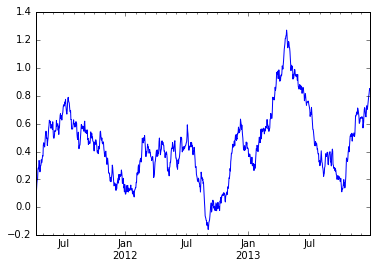

In [66]:
rolling.plot()

In [67]:
groupkey = lambda x: x.year
groups = rolling.groupby(groupkey)
groups.agg([np.mean, np.std])

,mean,std
2011,0.454233,0.171988
2012,0.286874,0.181930
2013,0.599933,0.276009


In [71]:
zscore = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(groupkey).transform(zscore)
normed.groupby(groupkey).agg([np.mean, np.std])

,mean,std
2011,-3.172066e-17,1
2012,-1.627720e-15,1
2013,-1.499106e-15,1


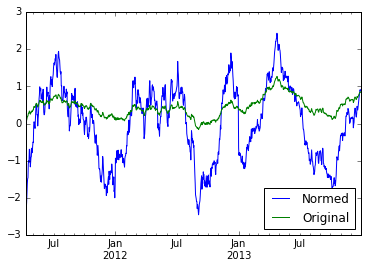

In [73]:
compared = pd.DataFrame({'Original': rolling, 
                        'Normed': normed})
compared.plot()

In [74]:
normed_in1std = normed[np.abs(normed) <= 1.0].count()
float(normed_in1std) / len(normed)

0.6485943775100401

## Filtering groups

In [75]:
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1
1,A,2
2,B,3
3,C,4
4,C,NaN
5,C,8


In [77]:
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

,Label,Values
0,A,1
1,A,2
3,C,4
4,C,NaN
5,C,8


In [78]:
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

,Label,Values
0,A,1
1,A,2
2,B,3


In [79]:
grouped = df.groupby('Label')
mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - mean) > 2.0
df.groupby('Label').filter(f)

,Label,Values
3,C,4
4,C,NaN
5,C,8


In [80]:
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f, dropna=False)

,Label,Values
0,A,1
1,A,2
2,NaN,NaN
3,C,4
4,C,NaN
5,C,8


# Discretization and Binning

In [81]:
np.random.seed(123456)
dist = np.random.normal(size=10000)

"{0} {1}".format(dist.mean(), dist.std())

'-0.002863324040906652 1.008716203199891'

In [82]:
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [84]:
bins = pd.cut(dist, 5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.0771, -0.633], (-2.0771, -0.633], (0.81, 2.254], ..., (-2.0771, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.0771, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, object): [(-3.528, -2.0771] < (-2.0771, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [85]:
bins.categories

Index(['(-3.528, -2.0771]', '(-2.0771, -0.633]', '(-0.633, 0.81]',
       '(0.81, 2.254]', '(2.254, 3.698]'],
      dtype='object')

In [86]:
min = dist.min()
max = dist.max()
delta = max - min
iwidth = delta / 5
extra = delta * 0.001
intervals = np.arange(min, max + extra, iwidth)
intervals[0] -= delta*0.001
intervals

array([-3.52809473, -2.07714421, -0.63341235,  0.81031951,  2.25405137,
        3.69778323])

In [87]:
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

In [88]:
pd.cut(dist, 5, right=False).categories

Index(['[-3.521, -2.0771)', '[-2.0771, -0.633)', '[-0.633, 0.81)',
       '[0.81, 2.254)', '[2.254, 3.705)'],
      dtype='object')

In [89]:
np.random.seed(123456)
ages = np.random.randint(6, 45, 50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

In [90]:
ranges = [6, 12, 18, 35, 50]
agebins = pd.cut(ages, ranges)
agebins.describe()

,counts,freqs
categories,,
"(6, 12]",8,0.16
"(12, 18]",9,0.18
"(18, 35]",21,0.42
"(35, 50]",12,0.24


In [91]:
ranges = [6, 12, 18, 35, 50]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

,counts,freqs
categories,,
Youth,8,0.16
Young Adult,9,0.18
Adult,21,0.42
Middle Aged,12,0.24


In [92]:
qbin = pd.qcut(dist, 5)
qbin.describe()

,counts,freqs
categories,,
"[-3.521, -0.861]",2000,0.2
"(-0.861, -0.241]",2000,0.2
"(-0.241, 0.261]",2000,0.2
"(0.261, 0.866]",2000,0.2
"(0.866, 3.698]",2000,0.2


In [ ]:
quantiles = [0, 
            0.001, 
            0.021,
            0.5-0.341,
            0.5,
            0.5+0.341,
            1.0-0.021,
            1.0-0.001,
            1.0]
qbin = pd.qcut(dist, quantiles)
